## 자료관리와 기본적인 통계분석

데이터를 Excel 파일에 저장하고 관리하고, 분석은 R이나 파이썬으로 수행하는 것이 최근의 추세입니다.
이제 파이썬으로 데이터를 분석하는 기본적인 방법을 알아보기로 하겠습니다.
엑셀 파일에 저장된 데이터를 읽고, 데이터를 정제하고, 기본적인 통계분석과 그래프를 작성하고, 결과를 엑셀 파일로 저장하는 **pandas** 라이브러리로 수행할 수 있습니다.
고수준의 통계분석, 기계학습, 심층학습, 빅 데이터 분석 등을 위한 라이브러리는 별도로 있지만 이런 라이브러리를 사용하기 전에 수행할 데이터에 대한 초반 작업은 모두 pandas 라이브러리를 이용해서 수행할 수 있습니다.

## 엑셀 파일을 코랩에 업로드 하기

분석할 엑셀 파일을 코랩에 업로드 합니다.

1. 쥬피터 노트북의 왼쪽에 위치한 폴더 모양의 아이콘을 클릭합니다.
그러면 파일을 관리할 수 있는 창이 열립니다.

2. 파일을 관리하는 화면에서 위쪽 화살표가 있는 아이콘을 클릭하면 업로드 할 파일을 선택할 수 있는 창이 나타납니다.

3. 엑셀 파일을 선택하면 업로드가 완료합니다.

## Pandas 라이브러리 사용하기

라이브러리를 사용하기 위해서는 다음과 같이 라이브러리를 `import`해야 합니다.
라이브러리 이름이 길 때는 `as` 다음에 간단한 약칭이나 별명을 붙일 수 있습니다.
Pandas 라이브러리에 대해서는 pd라는 약칭을 붙이는 것이 불문율로 자리잡았습니다.

In [1]:
import pandas as pd

## 엑셀 파일 읽기

Pandas 라이브러리에는 `read_excel()` 함수가 들어있는데 이 함수는 엑셀 파일에 저장된 자료를 읽어서 데이터프레임(DataFrame)이라는 자료형(자료구조)로 만들어 줍니다.
데이터프레임은 자료를 저장할 뿐 아니라 저장된 자료를 처리(분석)할 수 있는 기능을 가지고 있습니다.
이것이 파이썬에서 pandas가 중요한 위치를 차지하고 있는 이유입니다.

다음은 엑셀 파일을 읽고 엑셀 파일에 존재하는 워크시트(worksheet)의 이름을 알아보는 프로그램입니다.
여기서 `xl`은 엑셀 파일 자체를 가르키는 변수가 됩니다.
이 변수의 `sheet_names` 속성에 워크시트의 이름이 저장되어 있습니다.

In [2]:
xl = pd.ExcelFile('tomato.xlsx')
print(xl.sheet_names) 

['환경 원본(5분단위)', '환경 가공(누적일사보정)', '관수원본(EC,pH)', '생육 원본', '수확과원본', '출하량원본', '주차연결']


다음 프로그램은 `pd.ExcelFile()` 함수로 만든 엑셀 파일 변수의 `parse()` 함수로 특정 워크시트에 저장된 자료를 읽어서 데이터프레임으로 만듭니다.
이 프로그램의 `=` 왼쪽에 기재한 `df`가 워크시트의 자료를 가지고 있는 자료형이 데이터프레임인 변수입니다.
한 개의 워크시트는 한 개의 데이터프레임이 됩니다.

In [3]:
wksheet = '생육 원본'
df = xl.parse(wksheet)         

## `DataFrame`의 속성과 메소드

데이터프레임은 자신이 저장하고 있는 데이터에 대한 정보와 더불어 이 데이터를 분석할 수 있는 기능도 가지고 있습니다.
데이터에 대한 정보는 **데이터프레임에 부속된 변수**에 저장되는데 이를 **속성(attribute)**이라고 합니다.
데이터를 분석하는 일(계산, 연산)은 **데이터프레임에 부속된 함수**가 하는데  이를 **메소드(method)**라고 합니다.
따라서 데이터프레임에 부속된 속성과 메소드를 알면 되기 때문에 분석하기 위해 다른 라이브러리를 찾아다니는 일을 하지 않아도 됩니다.  
객체(또는 변수)로 하여금 어떤 일을 하게 하려면 객체의 메소드를 호출하면 되고, 객체가 저장하고 있는 정보를 보려면 객체의 속성을 조회하면 됩니다.

다음은 열이름을 저장하고 있는 `columns`라는 속성과 데이터의 첫 부분을 보여주는 `head()` 메소드의 사용법을 보여주는 예입니다.
예에서 보는 바와 같이 객체 이름을 쓴 다음 마침표를 찍고 속성 또는 메소드 이름을 기재합니다.

In [4]:
df.columns

Index(['조사일', '년', '주차', '개체번호 ', '초장 cm', '생장길이(cm)', '엽수', '엽길이(cm)',
       '엽폭 (cm)', '줄기굵기(mm) ', '화방높이 (cm)', '개화군', '착과군', '수확군', '열매수 ',
       '수확수 ', '수확과중(g)', 'SPAD'],
      dtype='object')

In [5]:
df.head()

,조사일,년,주차,개체번호,초장 cm,생장길이(cm),엽수,엽길이(cm),엽폭 (cm),줄기굵기(mm),화방높이 (cm),개화군,착과군,수확군,열매수,수확수,수확과중(g),SPAD
0,2020-10-05,2020,41,1,83.3,NaN,10,46.7,45.7,12.62,19.5,0.200000,NaN,NaN,NaN,NaN,NaN,46.800000
1,2020-10-05,2020,41,2,94.0,NaN,11,48.4,40.2,12.08,11.4,0.250000,NaN,NaN,NaN,NaN,NaN,48.033333
2,2020-10-05,2020,41,3,88.6,NaN,13,33.3,25.8,4.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.300000
3,2020-10-05,2020,41,4,96.1,NaN,10,45.5,38.6,8.06,10.5,0.166667,NaN,NaN,NaN,NaN,NaN,46.633333
4,2020-10-05,2020,41,5,83.0,NaN,13,37.1,29.0,4.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.366667


데이터프레임 객체 이름을 기재한 다음 마침표를 찍고 잠시 기다리면 데이터프레임에 부속된 속성과 메소드 목록이 나타나고 원하는 것을 클릭하면 코드가 자동적으로 삽입됩니다.
이렇게 속성과 메소드를 사용할 수 있기 때문에 분석에 소요되는 시간을 줄일 수 있습니다.

## 데이터에 대한 전반적인 정보 한꺼번에 보기

`DataFrame`에 저장된 **자료에 대한 전반적인 정보(meta data)**는 `info()` 메소드로 알아볼 수 있습니다.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   조사일        90 non-null     datetime64[ns]
 1   년          90 non-null     int64         
 2   주차         90 non-null     int64         
 3   개체번호       90 non-null     int64         
 4   초장 cm      90 non-null     float64       
 5   생장길이(cm)   78 non-null     float64       
 6   엽수         90 non-null     int64         
 7   엽길이(cm)    90 non-null     float64       
 8   엽폭 (cm)    90 non-null     float64       
 9   줄기굵기(mm)   90 non-null     float64       
 10  화방높이 (cm)  88 non-null     float64       
 11  개화군        88 non-null     float64       
 12  착과군        84 non-null     float64       
 13  수확군        42 non-null     float64       
 14  열매수        84 non-null     float64       
 15  수확수        36 non-null     float64       
 16  수확과중(g)    21 non-null     float64       
 17 

## 열 이름의 수정

`DataFrame`에 저장된 자료의 열 이름이 저장된 `columns` 속성에 새로운 값을 주면 열 이름을 변경할 수 있습니다.

In [7]:
old_names = df.columns
df.columns = ['Date', 'year', 'week', '개체번호 ', '초장 cm', '생장길이(cm)', '엽수', '엽길이(cm)',
       '엽폭 (cm)', '줄기굵기(mm) ', '화방높이 (cm)', '개화군', '착과군', '수확군', '열매수 ',
       '수확수 ', '수확과중(g)', 'SPAD']

In [8]:
print(df.columns)

Index(['Date', 'year', 'week', '개체번호 ', '초장 cm', '생장길이(cm)', '엽수', '엽길이(cm)',
       '엽폭 (cm)', '줄기굵기(mm) ', '화방높이 (cm)', '개화군', '착과군', '수확군', '열매수 ',
       '수확수 ', '수확과중(g)', 'SPAD'],
      dtype='object')


In [9]:
df.head()

,Date,year,week,개체번호,초장 cm,생장길이(cm),엽수,엽길이(cm),엽폭 (cm),줄기굵기(mm),화방높이 (cm),개화군,착과군,수확군,열매수,수확수,수확과중(g),SPAD
0,2020-10-05,2020,41,1,83.3,NaN,10,46.7,45.7,12.62,19.5,0.200000,NaN,NaN,NaN,NaN,NaN,46.800000
1,2020-10-05,2020,41,2,94.0,NaN,11,48.4,40.2,12.08,11.4,0.250000,NaN,NaN,NaN,NaN,NaN,48.033333
2,2020-10-05,2020,41,3,88.6,NaN,13,33.3,25.8,4.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.300000
3,2020-10-05,2020,41,4,96.1,NaN,10,45.5,38.6,8.06,10.5,0.166667,NaN,NaN,NaN,NaN,NaN,46.633333
4,2020-10-05,2020,41,5,83.0,NaN,13,37.1,29.0,4.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.366667


몇 개 열 이름의 끝에 빈칸이 붙어 있는 것을 볼 수 있습니다.
이런 것은 프로그램을 작성할 때 오류를 발생시킬 수 있습니다.
끝에 붙어 있는 불필요한 빈칸을 제거하기 위해 이름을 변경하는 기법을 사용할 수 있습니다.

In [10]:
new_names = ['조사일', '년', '주차', '개체번호', '초장 cm', '생장길이(cm)', '엽수', '엽길이(cm)',
       '엽폭 (cm)', '줄기굵기(mm)', '화방높이 (cm)', '개화군', '착과군', '수확군', '열매수',
       '수확수', '수확과중(g)', 'SPAD']

In [11]:
df.columns = new_names
df.head()

,조사일,년,주차,개체번호,초장 cm,생장길이(cm),엽수,엽길이(cm),엽폭 (cm),줄기굵기(mm),화방높이 (cm),개화군,착과군,수확군,열매수,수확수,수확과중(g),SPAD
0,2020-10-05,2020,41,1,83.3,NaN,10,46.7,45.7,12.62,19.5,0.200000,NaN,NaN,NaN,NaN,NaN,46.800000
1,2020-10-05,2020,41,2,94.0,NaN,11,48.4,40.2,12.08,11.4,0.250000,NaN,NaN,NaN,NaN,NaN,48.033333
2,2020-10-05,2020,41,3,88.6,NaN,13,33.3,25.8,4.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.300000
3,2020-10-05,2020,41,4,96.1,NaN,10,45.5,38.6,8.06,10.5,0.166667,NaN,NaN,NaN,NaN,NaN,46.633333
4,2020-10-05,2020,41,5,83.0,NaN,13,37.1,29.0,4.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.366667


## 행과 열의 수 조회

`DataFrame` 객체의 행과 열의 수를 알아보려면 `shape` 속성을 조회하면 됩니다.
이 속성에는 행과 열의 수 두 값이 `(행의 수, 열의 수)`와 같이 튜플(tuple) 자료형으로 저장되어 있습니다.
`[]` 연산자를 사용해서 행과 열의 수를 하나씩 알아볼 수 있습니다.

In [12]:
df.shape

(90, 18)

In [13]:
nrow = df.shape[0]
ncol = df.shape[1]
print(nrow, ncol)

90 18


## 열 이름으로 특정 열 추출

열 이름을 사용하면 자료에서 특정 열만 추출할 수 있습니다.
열 이름으로 특정 열을 추출할 때도 객체의 속성을 알아볼 때와 같이 `DataFrame` 객체 이름 다음에 `[]` 속에 열 이름을 기재하면 됩니다.

In [14]:
nb_leaves = df['엽수']

`DataFrame`의 각 열도 데이터를 저장하고 있는 `Series`라고 하는 자료형이며 `DataFrame`의 구성 원소입니다.
따라서 `DataFrame`과 거의 동일한 속성과 메소드를 가지고 있으므로 별도로 공부하지 않아도 됩니다.

In [15]:
nb_leaves.shape

(90,)

In [16]:
nb_leaves.head()

0    10
1    11
2    13
3    10
4    13
Name: 엽수, dtype: int64

## 여러 열을 추출

데이터프레임에서 여러 개의 열을 추출하려면 여러 개의 열 이름을 `[]` 속에 기재해야 합니다.
이렇게 추출한 결과도 데이터프레임이며 다른 이름으로 저장할 수도 있습니다.

In [17]:
df_leaf = df[['엽수', '엽길이(cm)']]
print(df_leaf.info())
print(df_leaf.shape)
print(df_leaf.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   엽수       90 non-null     int64  
 1   엽길이(cm)  90 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.5 KB
None
(90, 2)
Index(['엽수', '엽길이(cm)'], dtype='object')


## 결측치에 관한 정보 조회

각 열에서 **결측치**(missing value)가 아닌 값의 수를 알고 싶으면 데이터프레임의 `count()` 메소드를 사용하면 됩니다.
결측치는 기본적으로 `None`으로 표시하는데 `count()` 메소드는 각 변수별로 `None`이 아닌 값의 개수를 계산해줍니다.

In [18]:
df.count()

조사일          90
년            90
주차           90
개체번호         90
초장 cm        90
생장길이(cm)     78
엽수           90
엽길이(cm)      90
엽폭 (cm)      90
줄기굵기(mm)     90
화방높이 (cm)    88
개화군          88
착과군          84
수확군          42
열매수          84
수확수          36
수확과중(g)      21
SPAD         90
dtype: int64

In [19]:
df_leaf.count()

엽수         90
엽길이(cm)    90
dtype: int64

앞에서 배운 것을 결합하면 특정 열에서 결측치가 아닌 값의 개수는 다음과 같이 알아볼 수 있습니다.

In [20]:
df['수확수'].count()

36

`isna()` 메소드는 데이터프레임에 저장된 각 값이 결측치인지 아닌지를 검사한 결과를 논리값으로 준다.
결측치이면 `True`, 아니면 `False를 결과로 줍니다.

In [21]:
df.isna()

,조사일,년,주차,개체번호,초장 cm,생장길이(cm),엽수,엽길이(cm),엽폭 (cm),줄기굵기(mm),화방높이 (cm),개화군,착과군,수확군,열매수,수확수,수확과중(g),SPAD
0,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,True,True,False
1,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,True,True,False
2,False,False,False,False,False,True,False,False,False,False,True,True,True,True,True,True,True,False
3,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,True,True,False
4,False,False,False,False,False,True,False,False,False,False,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
86,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
87,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
88,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


특정 열에 대해서만 결측치 여부를 검사하려면 다음과 같이 할 수 있습니다.

In [22]:
df['개화군'].isna()

0     False
1     False
2      True
3     False
4      True
      ...  
85    False
86    False
87    False
88    False
89    False
Name: 개화군, Length: 90, dtype: bool

## 열의 추가와 삭제

자료를 분석하면서 기존 변수를 이용하여 새로운 변수를 만들어 내야 할 경우가 자주 있습니다.
기계학습이나 심층학습에서는 이를 **feature engineering**이라고 합니다.
새로 생성된 변수도 기존하는 데이터프레임에 열로 추가해서 분석할 때가 많습니다.

난수로 가상 자료를 만들어 실습하기로 하겠습니다.
난수를 발생하는 기능은 `numpy` 패키지의 `random` 모듈에 정의되어 있습니다.
그 중에서 `randn()` 함수는 표준정규분포의 난수를 발생하는 함수인데 원하는 난수의 개수를 인자로 해서 호출하면 됩니다.
`numpy` 패키지는 주로 `np`라는 이름으로 사용합니다.

다음은 10개의 난수를 생성하는 프로그램입니다.

In [23]:
import numpy as np
np.random.randn(10)

array([ 0.81358917,  0.85135579,  1.36279262,  0.02962866, -0.12228614,
       -1.2222848 , -0.30281138,  1.03446926,  0.441639  , -0.04639856])

다음은 데이터프레임의 행위 수 만큼 난수를 발생하여 변수에 저장하고 이를 데이터프레임의 열로 저장하는 프로그램입니다.
데이터프레임을 사용할 때 `[]` 사이에 기존 이름이 아닌 새로운 열 이름을 사용하면 새로운 열이 자동적으로 추가됩니다.

In [24]:
new_var = np.random.randn(df.shape[0])
df['new_var'] = new_var

In [25]:
df.head()

,조사일,년,주차,개체번호,초장 cm,생장길이(cm),엽수,엽길이(cm),엽폭 (cm),줄기굵기(mm),화방높이 (cm),개화군,착과군,수확군,열매수,수확수,수확과중(g),SPAD,new_var
0,2020-10-05,2020,41,1,83.3,NaN,10,46.7,45.7,12.62,19.5,0.200000,NaN,NaN,NaN,NaN,NaN,46.800000,0.839270
1,2020-10-05,2020,41,2,94.0,NaN,11,48.4,40.2,12.08,11.4,0.250000,NaN,NaN,NaN,NaN,NaN,48.033333,0.938620
2,2020-10-05,2020,41,3,88.6,NaN,13,33.3,25.8,4.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.300000,-0.058401
3,2020-10-05,2020,41,4,96.1,NaN,10,45.5,38.6,8.06,10.5,0.166667,NaN,NaN,NaN,NaN,NaN,46.633333,0.018160
4,2020-10-05,2020,41,5,83.0,NaN,13,37.1,29.0,4.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.366667,1.332275


데이터프레임에서 특정 열을 삭제할 때 `drop()` 메소드에 삭제하고자 하는 열 이름을 `[]`로 감싸서 기재하면 됩니다.

In [26]:
df = df.drop(['new_var'], axis=1)

In [27]:
df.head()

,조사일,년,주차,개체번호,초장 cm,생장길이(cm),엽수,엽길이(cm),엽폭 (cm),줄기굵기(mm),화방높이 (cm),개화군,착과군,수확군,열매수,수확수,수확과중(g),SPAD
0,2020-10-05,2020,41,1,83.3,NaN,10,46.7,45.7,12.62,19.5,0.200000,NaN,NaN,NaN,NaN,NaN,46.800000
1,2020-10-05,2020,41,2,94.0,NaN,11,48.4,40.2,12.08,11.4,0.250000,NaN,NaN,NaN,NaN,NaN,48.033333
2,2020-10-05,2020,41,3,88.6,NaN,13,33.3,25.8,4.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.300000
3,2020-10-05,2020,41,4,96.1,NaN,10,45.5,38.6,8.06,10.5,0.166667,NaN,NaN,NaN,NaN,NaN,46.633333
4,2020-10-05,2020,41,5,83.0,NaN,13,37.1,29.0,4.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.366667


## 척도의 지정

컴퓨터로 자료를 처리할 때 입력한 자료로 어떤 계산 또는 연산을 할 수 있는가를 지정하면 예기치 않는 오류를 방지할 수 있습니다.
변수의 **척도(scale)**는 그 변수를 측정한 값으로 어떤 계산이나 연산을 할 수 있는지 나타내는 개념입니다.
프로그래밍 언어에서도 이와 유사한 개념으로 **자료형**(data type)이 있습니다.
통계학에서는 수치를 4가지 척도 **명목척도**(nominal scale), **순서척도**(ordinal scale), **구간척도**(interval scale), **비척도**(ratio scale)로 구분하는데 대부분의 프로그래밍 언어가 이를 구현하고 있지 않습니다.
따라서 올바른 자료분석을 위해서 척도를 지정하는 추가적인 조치를 해야만 합니다.
`pandas`에 척도를 위한 조치가 구현되어 있지만 구간척도를 지정하는 방법은 없으므로 자료를 분석하는 사람은 구간척도를 갖는 변수에 대해서는 특히 조심해야 한다.

예를 들어 사용하고 있는 데이터에서 년도를 나타내는 `년`이란 열을 생각해봅시다.
이 열에 있는 값은 년도를 나타내는 숫자이지만 이 숫자로 곱셈, 나눗셈, 덧셈을 하면 안됩니다.
즉 `년`이란 열에 들어 있는 수치로 할 수 없는 계산이 있는 것이죠.
이런 제약조건을 척도로 지정하는 것입니다.

대부분의 프로그래밍 언어는 아무런 지정이 없으면 수치를 비척도로 간주하므로 **범주형 변수(categorical variable, 명목척도나 순서척도를 갖는 변수)**는 범주형 변수임을 지정해야 합니다.
이를 위해 `pandas` 패키지는 `Categorical()` 함수를 지원하고 있습니다.
`Categorical()` 함수를 호출할 때 범주형 변수로 지정할 열을 인자로 전달해야 합니다.
그리고 `categories` 매개변수에는 범주형 변수가 가질 수 있는 값의 목록을 전달하고, `ordered` 매개변수에는 순서척도 여부를 `True` 또는 `False`로 지정합니다.
`ordered` 매개변수에 `True`를 전달하면 순서척도임을 지정하는 것이며 값의 순서는 `categories` 매개변수에 전달한 값의 순서와 같습니다.

한 가지 주의할 점은 `Categorical()` 함수는 원자료의 척도를 변경하지 않고 척도가 변경된 새로운 자료를 만들어 주므로 `Categoricale()` 함수의 결과를 저장해야 합니다.

먼저 각 열에 어떤 값들이 나타나는지 확인하는 것이 필요합니다.
이를 위해 `unique()` 메소드를 다음과 같이 사용할 수 있습니다.

In [28]:
df['개체번호'].unique()

array([1, 2, 3, 4, 5, 6])

In [29]:
df['개체번호'] = pd.Categorical(df['개체번호'], categories=df['개체번호'].unique(), ordered=False )

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   조사일        90 non-null     datetime64[ns]
 1   년          90 non-null     int64         
 2   주차         90 non-null     int64         
 3   개체번호       90 non-null     category      
 4   초장 cm      90 non-null     float64       
 5   생장길이(cm)   78 non-null     float64       
 6   엽수         90 non-null     int64         
 7   엽길이(cm)    90 non-null     float64       
 8   엽폭 (cm)    90 non-null     float64       
 9   줄기굵기(mm)   90 non-null     float64       
 10  화방높이 (cm)  88 non-null     float64       
 11  개화군        88 non-null     float64       
 12  착과군        84 non-null     float64       
 13  수확군        42 non-null     float64       
 14  열매수        84 non-null     float64       
 15  수확수        36 non-null     float64       
 16  수확과중(g)    21 non-null     float64       
 17 

## 데이터프레임을 엑셀 파일로 저장하기

데이터프레임을 여러 가지 방법으로 저장할 수 있지만 여기서는 엑셀 파일로 저장하는 방법만 다루기로 하겠습니다.
데이터프레임의 `to_excel()` 메소드를 이용하여 엑셀 파일로 저장합니다.
`to_excel()` 메소드를 사용할 때 `()` 속에 엑셀 파일 이름과 `sheet_name` 매개변수에 워크시트 이름을 지정하면 됩니다.
`to_excel()` 메소드는 기본적으로 행 번호와 열 이름도 파일에 저장해줍니다.
행 번호는 출력하지 않는 것이 좋으며 이때는 `index` 매개변수에 `False`를 지정하면 됩니다.

In [31]:
df.to_excel('tomato_.xlsx', sheet_name='생육 원본', index=False)

In [32]:
df.columns

Index(['조사일', '년', '주차', '개체번호', '초장 cm', '생장길이(cm)', '엽수', '엽길이(cm)',
       '엽폭 (cm)', '줄기굵기(mm)', '화방높이 (cm)', '개화군', '착과군', '수확군', '열매수', '수확수',
       '수확과중(g)', 'SPAD'],
      dtype='object')

데이터프레임의 일부만 엑셀 파일에 저장할 수도 있는데 `columns` 매개변수에 저장할 열 이름을 지정하면 됩니다.

In [33]:
df.to_excel('tomato_.xlsx', sheet_name='생육 원본 일부', index=False,
            columns=['개체번호', '초장 cm', '생장길이(cm)', '엽수', '엽길이(cm)'])

In [34]:
df.columns

Index(['조사일', '년', '주차', '개체번호', '초장 cm', '생장길이(cm)', '엽수', '엽길이(cm)',
       '엽폭 (cm)', '줄기굵기(mm)', '화방높이 (cm)', '개화군', '착과군', '수확군', '열매수', '수확수',
       '수확과중(g)', 'SPAD'],
      dtype='object')

한 개의 엑셀 파일에 여러 개의 데이터프레임을 여러 개의 워크시트로 저장할 때는 다음과 같은 방법을 사용하면 됩니다.

In [35]:
writer = pd.ExcelWriter('tomato_.xlsx', engine='openpyxl')
df.to_excel(writer, '생육 원본', index=False)
df[['개체번호', '초장 cm', '생장길이(cm)', '엽수', '엽길이(cm)']].to_excel(writer, '생육 원본 일부', index=False)
writer.save()

## 기본적인 통계분석

데이터프레임은 자료분석에 필요한 기본적인 메소드도 가지고 있습니다.
다음은 이 메소드를 이용해서 특정 열의 최대값, 최소값, 평균, 중앙값, 첨도, 비대칭도(왜도), 분산, 표준편차, 평균편차, 합, 분위수를 구하는 예입니다.

In [36]:
print(df['초장 cm'].max())
print(df['초장 cm'].min())
print(df['초장 cm'].mean())
print(df['초장 cm'].median())
print(df['초장 cm'].kurt())
print(df['초장 cm'].skew())
print(df['초장 cm'].var())
print(df['초장 cm'].std())
print(df['초장 cm'].mad())
print(df['초장 cm'].sum())
qct = [0.1, 0.2, 0.3, 0.4, 0.5]
print(df['초장 cm'].quantile(qct))

549.4
83.0
312.04777777777775
259.05
-1.5916903851720183
0.008321517795590363
22199.769938826466
148.9958722207648
139.0754074074074
28084.3
0.1    121.89
0.2    160.20
0.3    204.24
0.4    233.20
0.5    259.05
Name: 초장 cm, dtype: float64


특정 열을 지정하지 않고 통계치를 구할 수 있는 모든 열에서 구하고 싶으면 데이터프레임에 대해 통계치를 구하는 메소드를 실행하면 됩니다.
이럴 경우 척도에 대해 조심해야 합니다.
아래에서 년도의 평균도 나타나는데 이는 아무런 의미가 없습니다.

In [37]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


년            2020.466667
주차             26.533333
초장 cm         312.047778
생장길이(cm)       21.993590
엽수             10.233333
엽길이(cm)        43.331111
엽폭 (cm)        41.126667
줄기굵기(mm)       10.039778
화방높이 (cm)      26.052273
개화군             6.459987
착과군             6.366128
수확군             4.496032
열매수            12.500000
수확수             1.388889
수확과중(g)       179.348413
SPAD           41.244815
dtype: float64

다음은 비척도를 갖는 몇몇 열 간의 Pearson 상관계수 행렬을 `corr()` 메소드로 구하는 예입니다.
범주형 변수로 지정된 열에 대해서는 다른 종류의 상관계수를 구합니다.
통계분석에서는 척도를 지정하는 것이 중요하다는 것을 보여주는 대표적인 예라고 할 수 있습니다.

In [39]:
df_cont = df[['초장 cm', '생장길이(cm)', '엽수', '엽길이(cm)', '엽폭 (cm)', '줄기굵기(mm)', '화방높이 (cm)']]
df_cont.corr()

,초장 cm,생장길이(cm),엽수,엽길이(cm),엽폭 (cm),줄기굵기(mm),화방높이 (cm)
초장 cm,1.000000,-0.532572,-0.053970,-0.747620,-0.545860,-0.567707,0.027496
생장길이(cm),-0.532572,1.000000,0.179085,0.586868,0.602083,0.660551,0.135293
엽수,-0.053970,0.179085,1.000000,-0.051075,-0.250401,-0.261086,-0.597206
엽길이(cm),-0.747620,0.586868,-0.051075,1.000000,0.801691,0.796040,0.158111
엽폭 (cm),-0.545860,0.602083,-0.250401,0.801691,1.000000,0.869159,0.333722
줄기굵기(mm),-0.567707,0.660551,-0.261086,0.796040,0.869159,1.000000,0.361537
화방높이 (cm),0.027496,0.135293,-0.597206,0.158111,0.333722,0.361537,1.000000


## 그래프 작성

데이터프레임의 `plot()` 메소드로 **산점도(scatter plot)**, **히스토그램(histogram)**, **상자 그림(box plot)**, **꺽은선 그래프(line graph)**, **원 그래프(pie chart)** 등을 작성할 수 있습니다.
작성한 그래프를 쥬피터 노트북에 포함시키려면 먼저 다음 문장을 실행해야 합니다.

In [40]:
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51460 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44405 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51460 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44405 missing from current font.
  font.set_text

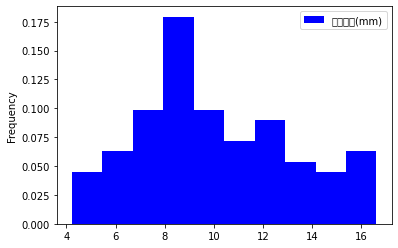

In [41]:
df.plot(y='줄기굵기(mm)', kind='hist', density=True, color='blue')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51460 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44405 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51460 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44405 missing from current font.
  font.set_text

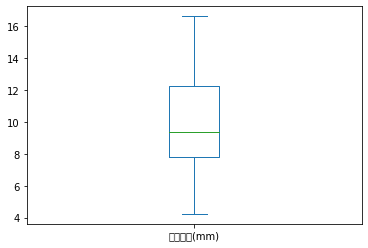

In [42]:
df.plot(y='줄기굵기(mm)', kind='box')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50685 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44600 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50685 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44600 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text

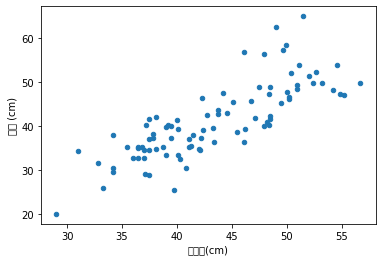

In [43]:
df.plot(x='엽길이(cm)', y='엽폭 (cm)', kind='scatter')

`value_counts()` 메소드를 사용하면 범주형 변수나 이산변수의 도수분포표를 쉽게 작성할 수 있습니다.

In [44]:
df['열매수'].value_counts(sort=False, normalize=True)

4.0     0.023810
2.0     0.047619
3.0     0.011905
5.0     0.047619
6.0     0.023810
7.0     0.047619
8.0     0.011905
9.0     0.059524
10.0    0.011905
11.0    0.035714
12.0    0.047619
13.0    0.130952
14.0    0.083333
15.0    0.130952
16.0    0.107143
20.0    0.035714
18.0    0.059524
17.0    0.035714
19.0    0.047619
Name: 열매수, dtype: float64

## 집단별 분석

자료를 범주형 변수의 값에 따라 소집단으로 나누어 분석하려면 `groupby()` 메소드를 사용합니다.
다음은 자료를 연도별로 분석하는 예입니다.

In [46]:
df.groupby('년').mean()

,주차,초장 cm,생장길이(cm),엽수,엽길이(cm),엽폭 (cm),줄기굵기(mm),화방높이 (cm),개화군,착과군,수확군,열매수,수확수,수확과중(g),SPAD
년,,,,,,,,,,,,,,,
2020,44.5,181.664583,24.519048,10.416667,47.554167,44.637500,11.406458,25.934783,2.898453,2.890590,NaN,9.238095,NaN,NaN,44.784028
2021,6.0,461.057143,19.047222,10.023810,38.504762,37.114286,8.477857,26.180952,10.360714,9.841667,4.496032,15.761905,1.388889,179.348413,37.200000


In [48]:
df.groupby('년')[['수확수', '수확과중(g)']].mean()

,수확수,수확과중(g)
년,,
2020,NaN,NaN
2021,1.388889,179.348413


년
2020    AxesSubplot(0.125,0.125;0.775x0.755)
2021    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50685 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44600 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50685 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44600 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text

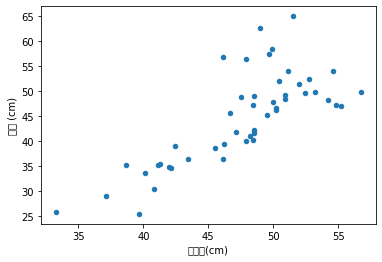

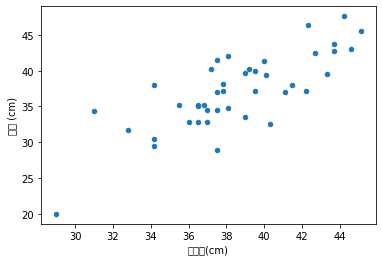

In [49]:
df.groupby('년').plot(kind='scatter', x='엽길이(cm)', y='엽폭 (cm)')

## 집계표 작성

In [58]:
df.pivot_table(index=['년'], columns=['주차'], values = ['엽길이(cm)', '엽폭 (cm)'],
               aggfunc='mean', margins=True, margins_name="총평균")

엽길이(cm)                                                               \
주차            3     4          5          6          7          8          9   
년                                                                              
2020        NaN   NaN        NaN        NaN        NaN        NaN        NaN   
2021  41.833333  41.8  41.166667  37.083333  35.433333  36.933333  35.283333   
총평균   41.833333  41.8  41.166667  37.083333  35.433333  36.933333  35.283333   

                                   ...    엽폭 (cm)                    \
주차           41         42     43  ...          9     41         42   
년                                  ...                                
2020  43.233333  49.583333  50.35  ...        NaN  37.75  52.666667   
2021        NaN        NaN    NaN  ...  32.916667    NaN        NaN   
총평균   43.233333  49.583333  50.35  ...  32.916667  37.75  52.666667   

                                                                        \
주차           43         44         45         46         47         48   
년                                                                        
2020  57.783333  49.133333  44.283333  42.316667  36.833333  36.333333   
2021        NaN        NaN        NaN        NaN        NaN        NaN   
총평균   57.783333  49.133333  44.283333  42.316667  36.833333  36.333333   

                 
주차          총평균  
년                
2020  44.637500  
2021  37.114286  
총평균   41.126667  

[3 rows x 32 columns]

In [57]:
df.pivot_table(index=['년', '주차'], values = ['엽길이(cm)', '엽폭 (cm)'],
               aggfunc='mean', margins=True, margins_name="총평균")

엽길이(cm)    엽폭 (cm)
년    주차                      
2020 41  43.233333  37.750000
     42  49.583333  52.666667
     43  50.350000  57.783333
     44  53.566667  49.133333
     45  50.166667  44.283333
     46  47.800000  42.316667
     47  44.000000  36.833333
     48  41.733333  36.333333
2021 3   41.833333  41.350000
     4   41.800000  41.333333
     5   41.166667  38.933333
     6   37.083333  35.383333
     7   35.433333  34.216667
     8   36.933333  35.666667
     9   35.283333  32.916667
총평균      43.331111  41.126667